In [193]:
import miepython as mp
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.05*10**(-34)
c = 3*10**8
wav = 1064*10**(-9)
w0 = c/wav*2*np.pi
kb = 1.38*10**(-23)
R = 1500*10**(-9)

In [194]:
m = 1.551-6j*10**(-8) #'https://www.sciencedirect.com/science/article/pii/S0030401800011524?via%3Dihub'
x = 2*np.pi*R/wav
qext, qsca, qback, g = mp.mie(m,x)

print("The extinction efficiency  is %.3f" % qext)
print("The scattering efficiency  is %.3f" % qsca)
print("The backscatter efficiency is %.3f" % qback)
print("The scattering anisotropy  is %.3f" % g)

The extinction efficiency  is 2.764
The scattering efficiency  is 2.764
The backscatter efficiency is 9.986
The scattering anisotropy  is 0.697


In [ ]:
# See below for angular integration that gives the lambda3 factor on the force noise.
# See below the factor 9.2 on the damping that comes from approximating to a power law

In [387]:
#w0 = 2*np.pi*3*10**8/(wav)
waist = 50*10**(-6)
Psc = 80*10**(-3)*R**2/waist**2*qsca
k = 2*np.pi/(wav)
m = 4/3*np.pi*(R)**3*1850
lambda3 = 0.02416001975155623 # see below for calculations
Ssc = lambda3*hbar*w0/c**2*Psc
ysc = 9.2*lambda1*Psc/hbar/w0*(hbar*k)**2/2/m/0.5/hbar/w0
ysc = 9.2*lambda1*Psc/c**2/m
Tsc = hbar*w0/18.4/kb  # 18.4 comes from comparing to dipole scattering formaula
print('Damping:')
print(ysc)
print('\nSpectral Density:')
print(Ssc)
print('\nTemperature:')
print(Tsc)
print(Ssc/ysc/2/m/kb)

Damping:
6.541130922517696e-07

Spectral Density:
9.938503293444427e-42

Temperature:
732.5746474829448
21.048683956994953


In [388]:
print(np.sqrt(Ssc))

3.1525391819047115e-21


In [251]:
P = 5*10**(-8)
y = 4.10568*1e-6*P*1e2/R
print(1/y)
tau = 3600*24*28
print(np.sqrt(2/tau/y))
wm = 30*2*np.pi
T = 293
Sth = 2*m*y*kb*T
print('Damping:')
print(y)
print('\nSpectral Density:')
print(Sth)
print('\nTemperature:')
print(T)

73069.50371193078
0.2457803677673157
Damping:
1.3685600000000002e-05

Spectral Density:
2.8945073697271734e-39

Temperature:
293


In [252]:
# Let's combine the two to see what we would get
ytot = y+ysc
Stot = Sth+Ssc
print('Damping:')
print(ytot)
print('\nSpectral Density:')
print(Stot)
print('\nTemperature:')
print(Stot/ytot/2/m/kb)

Damping:
1.4339713092251771e-05

Spectral Density:
3.240405268217098e-39

Temperature:
313.0514145639297


Text(0, 0.5, 'Spectral Density (N$^{2}$/Hz)')

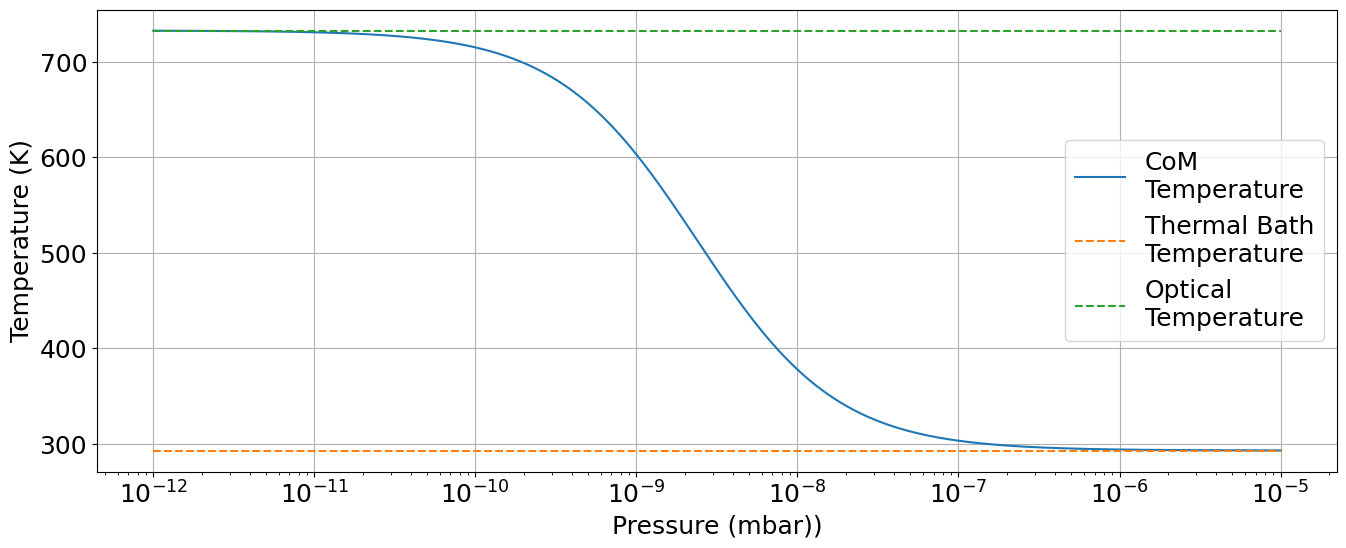

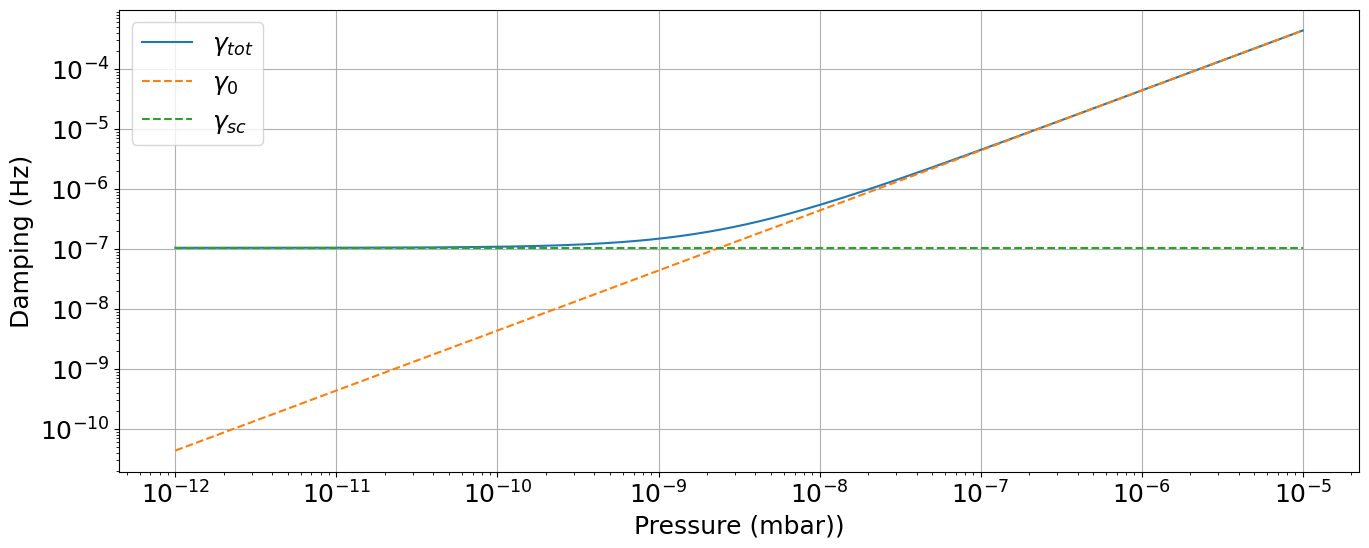

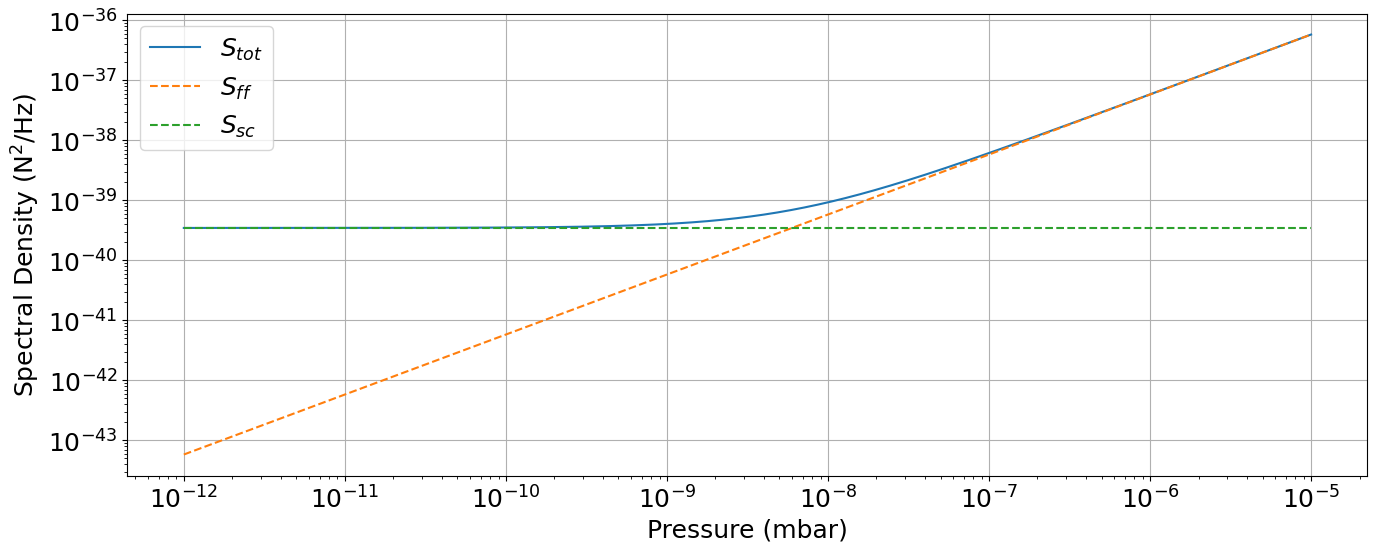

In [253]:
pressure = np.logspace(-12, -5, 1000)
ygas = 4.10568*1e-6*pressure*1e2/R
Sgas = 2*m*ygas*kb*T
plt.rc('font', size = 18)
plt.figure(figsize = (16, 6))
plt.grid()
#plt.grid(which = 'minor', alpha = 0.3)
plt.plot(pressure, (Sgas+Ssc)/(ygas + ysc)/2/m/kb, label = 'CoM\nTemperature')
plt.plot([pressure[0], pressure[-1]], [T, T], '--', label = 'Thermal Bath\nTemperature')
plt.plot([pressure[0], pressure[-1]], [Tsc, Tsc], '--', label = 'Optical\nTemperature')
plt.xscale('log')
plt.legend()
plt.xlabel('Pressure (mbar))', fontsize = 18)
plt.ylabel('Temperature (K)', fontsize = 18)
#plt.yscale('log')

plt.figure(figsize = (16, 6))
plt.grid()
#plt.grid(which = 'minor', alpha = 0.3)
plt.plot(pressure, (ygas+ysc)/2/np.pi, label = '$\gamma_{tot}$')
plt.plot(pressure, ygas/2/np.pi, '--', label = '$\gamma_{0}$')
plt.plot([pressure[0], pressure[-1]], [ysc/2/np.pi, ysc/2/np.pi], '--', label = '$\gamma_{sc}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Pressure (mbar))', fontsize = 18)
plt.ylabel('Damping (Hz)', fontsize = 18)

plt.figure(figsize = (16, 6))
plt.grid()
#plt.grid(which = 'minor', alpha = 0.3)
plt.plot(pressure, Sgas+Ssc, label = '$S_{tot}$')
plt.plot(pressure, Sgas, '--', label = '$S_{ff}$')
plt.plot([pressure[0], pressure[-1]], [Ssc, Ssc], '--', label = '$S_{sc}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Pressure (mbar)', fontsize = 18)
plt.ylabel('Spectral Density (N$^{2}$/Hz)', fontsize = 18)

# Getting the approximate power law for finding the optical bath damping

In [42]:
wavl = np.linspace(550, 1300)*10**(-9)
x = 2*np.pi*R/wavl
qext, qsca, qback, g = mp.mie(m,x)

Text(0, 0.5, 'Scattering cross-section\n(nm$^{2}$)')

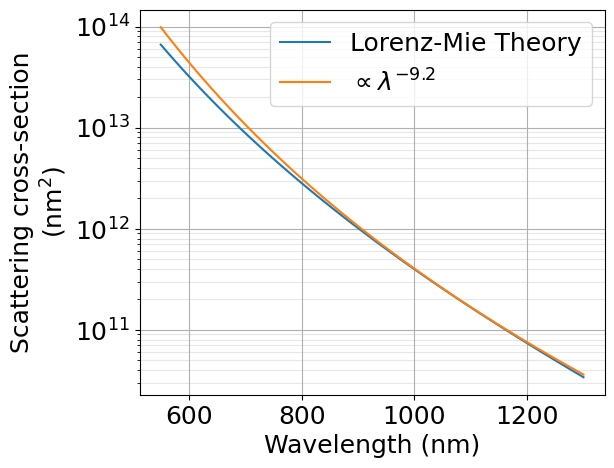

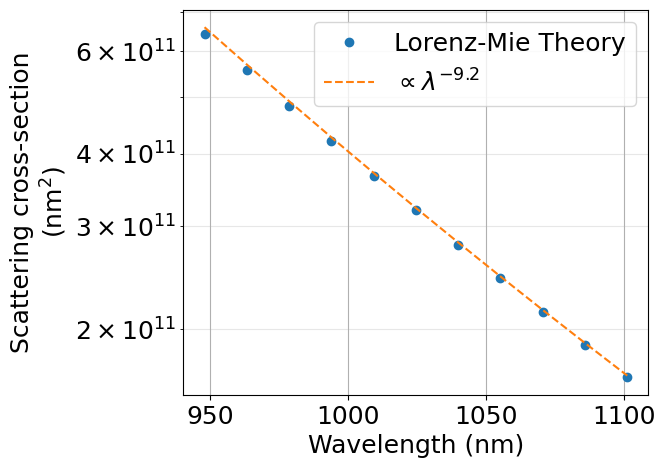

In [85]:
plt.figure(figsize = (6, 5))
plt.grid()
plt.grid(which = 'minor', alpha = 0.3)
plt.plot(wavl*10**9, qsca*np.pi*((R*10**9)**2), label = 'Lorenz-Mie Theory')
plt.plot(wavl*10**9, 3.6*10**(-51)/wavl**9.2*np.pi*((R*10**9)**2), label = '$\propto\lambda^{-9.2}$')
plt.yscale('log')
plt.legend()
plt.xlabel('Wavelength (nm)', fontsize = 18)
plt.ylabel('Scattering cross-section\n(nm$^{2}$)', fontsize = 18)
lb = 26
ub = 37
plt.figure(figsize = (6, 5))
plt.grid()
plt.grid(which = 'minor', alpha = 0.3)
plt.plot(wavl[lb:ub]*10**9, qsca[lb:ub]*np.pi*((R*10**9)**2), 'o', label = 'Lorenz-Mie Theory')
plt.plot(wavl[lb:ub]*10**9, 3.6*10**(-51)/wavl[lb:ub]**9.2*np.pi*((R*10**9)**2), '--', label = '$\propto\lambda^{-9.2}$')
plt.yscale('log')
plt.legend()
plt.xlabel('Wavelength (nm)', fontsize = 18)
plt.ylabel('Scattering cross-section\n(nm$^{2}$)', fontsize = 18)

# Angular scattering

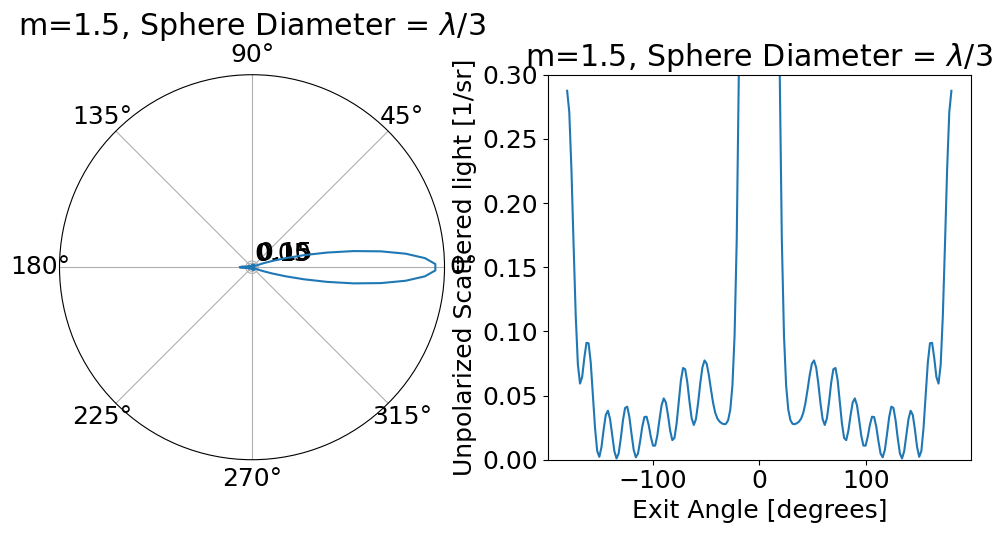

In [201]:
R = 1500*10**(-9)
m = 1.551-6j*10**(-8) #'https://www.sciencedirect.com/science/article/pii/S0030401800011524?via%3Dihub'
x = 2*np.pi*R/wav
theta = np.linspace(-180,180,180)
mu = np.cos(theta/180*np.pi)

scat = mp.i_par(m,x,mu)

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax=plt.subplot(121, projection='polar')
ax.plot(theta/180*np.pi,scat)
ax.set_rticks([0.05, 0.1,0.15]) 
ax.set_title("m=1.5, Sphere Diameter = $\lambda$/3")

plt.subplot(122)
plt.plot(theta,scat)
plt.xlabel('Exit Angle [degrees]')
plt.ylabel('Unpolarized Scattered light [1/sr]')
plt.title('m=1.5, Sphere Diameter = $\lambda$/3')
plt.ylim(0.00,0.3)

plt.show()

In [202]:
scat1 = mp.i_unpolarized(m,x,np.cos(0/180*np.pi))
scat2 = mp.i_unpolarized(m,x,np.cos(180/180*np.pi))
scat3 = mp.i_unpolarized(m,x,np.cos(90/180*np.pi))
scat4 = mp.i_unpolarized(m,x,np.cos(270/180*np.pi))
print(scat1, scat2)
print(scat3, scat4)

4.462893495441975 0.2874859914690952
0.026320762776279292 0.02632076277627927


In [203]:
print((scat1+scat2)/((scat1+scat2) + 2*(scat3+scat4)))
print((scat3+scat4)/((scat1+scat2) + 2*(scat3+scat4)))
print((scat3+scat4)/((scat1+scat2) + 2*(scat3+scat4)))

0.9783174694944654
0.010841265252767256
0.010841265252767256


In [204]:
scat1+scat2 + 2*(scat3+scat4)

4.855662538016188

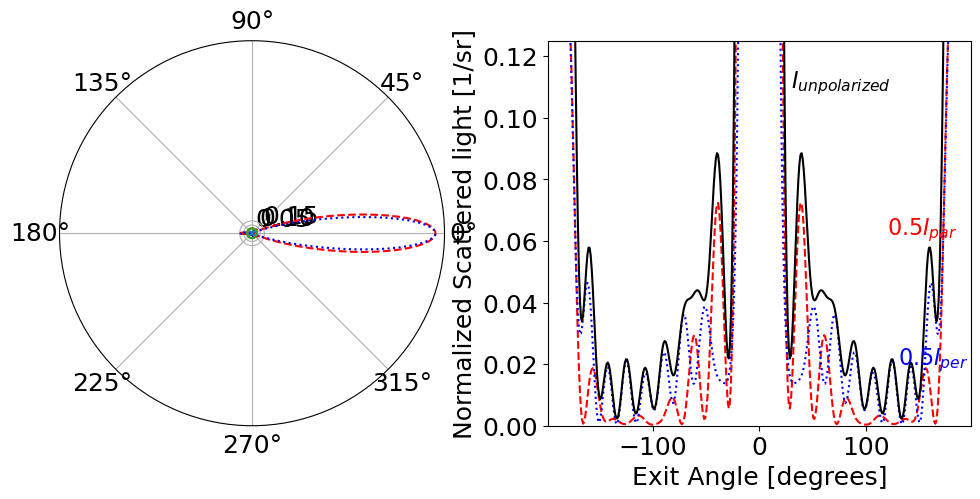

In [360]:
R = 1500*10**(-9)
m = 1.551-6j*10**(-8) #'https://www.sciencedirect.com/science/article/pii/S0030401800011524?via%3Dihub'
x = 2*np.pi*R/wav
theta = np.linspace(-180,180,360)
mu = np.cos(theta/180*np.pi)
ipar = mp.i_par(m,x,mu)/2
iper = mp.i_per(m,x,mu)/2
iun  = mp.i_unpolarized(m,x,mu)

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax=plt.subplot(121, projection='polar')
ax.plot(theta/180*np.pi,iper,'r--')
ax.plot(theta/180*np.pi,ipar,'b:')
#ax.plot(theta/180*np.pi,iun,'k')
ax.plot(theta/180*np.pi, 0.06*(1 - np.sin(theta/180*np.pi)**2))
ax.plot(theta/180*np.pi, 0.06*(np.zeros(len(theta))+1))

ax.plot(theta/180*np.pi, 0.06*(np.zeros(len(theta))+1))

ax.set_rticks([0.05, 0.1,0.15])
#plt.title('m=%.2f, Sphere Parameter = %.2f' %(m,x))

plt.subplot(122)
plt.plot(theta,iper,'r--')
plt.plot(theta,ipar,'b:')
plt.plot(theta,iun,'k')

plt.xlabel('Exit Angle [degrees]')
plt.ylabel('Normalized Scattered light [1/sr]')
#plt.title('m=%.2f, Sphere Parameter = %.2f' %(m,x))
plt.ylim(0.00,0.125)
plt.text(130,0.02,r"$0.5I_{per}$",color="blue", fontsize=16)
plt.text(120,0.062,r"$0.5I_{par}$",color="red", fontsize=16)
plt.text(30,0.11,r"$I_{unpolarized}$",color="black", fontsize=16)


plt.show()

In [361]:
# So convert scattering into x,y
theta = np.linspace(-180,180,360)
xtest = ipar*np.cos(theta/180*np.pi)
ytest = ipar*np.sin(theta/180*np.pi)

(-0.15, 0.15)

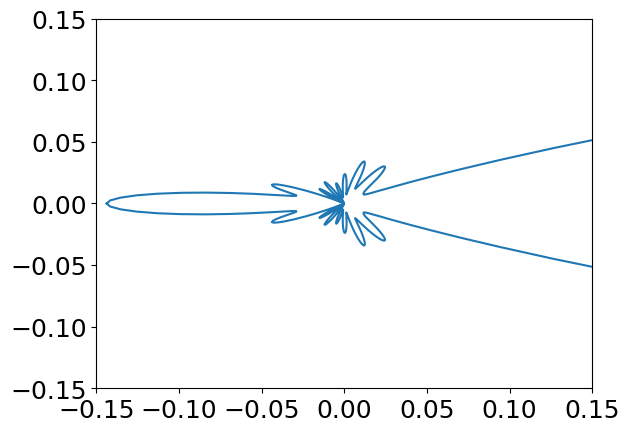

In [362]:
plt.plot(xtest, ytest)
lb = 90
ub = 270
#f1 = 0.225
#f2 = 0.24
#plt.plot(-xtest[lb:ub]*f1, ytest[lb:ub]*f2)
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)

In [363]:
maxy1 = np.max(ytest[180:])
maxy2 = np.max(ytest[270:])
print(maxy1, maxy2)
maxx1 = np.max(xtest[90:270])
maxx2 = np.min(xtest[:])
print(maxx1, maxx2)
print(maxy2/maxy1)
print(maxx2/maxx1)

0.19660114092337586 0.022706812001777904
2.227399718023391 -0.1437429957345476
0.1154968475520076
-0.06453399206771296


In [364]:
argmaxy1 = np.argmax(ytest[180:])
argmaxy2 = np.argmax(ytest[270:])
print(argmaxy1, argmaxy2)
argmaxx1 = np.argmax(xtest[90:270])
argmaxx2 = np.argmin(xtest[:])
print(argmaxx1, argmaxx2)

8 0
89 0


In [365]:
circy1 = ytest[90:270]
circx1 = xtest[90:270]

circy21 = ytest[0:90]
circx21 = xtest[0:90]
circy22 = ytest[270:]
circx22 = xtest[270:]

circy2 = np.concatenate((circy21[::-1], circy22[::-1]))
circx2 = np.concatenate((circx21[::-1], circx22[::-1]))

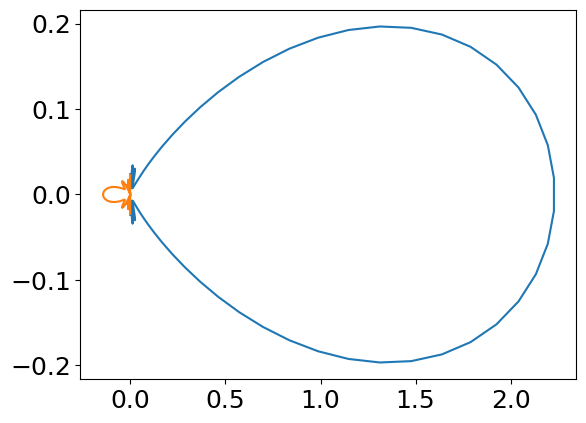

In [366]:
plt.plot(circx1, circy1)
plt.plot(circx2, circy2)

In [367]:
gradsy = (circy1 - circy2)/180
gradsx = (circx1 + circx2)/180

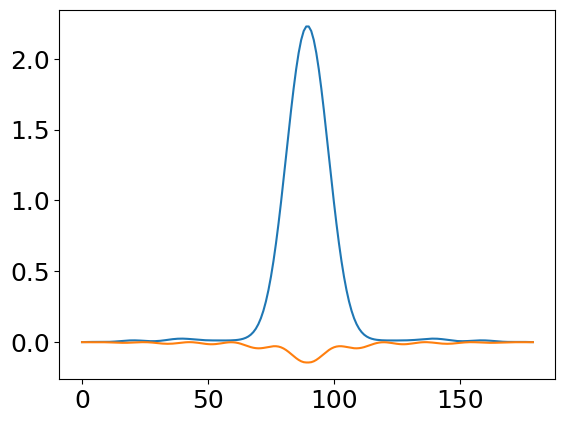

In [368]:
plt.plot(circx1)
plt.plot(circx2)

(-0.15, 0.15)

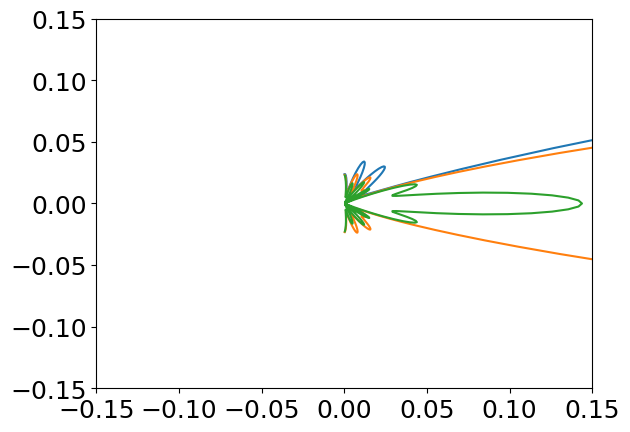

In [369]:
thetaarg =179

#plt.plot(circx2 + gradsx*theta[180+thetaarg], circy2 + gradsy*theta[180+thetaarg])
plt.plot(circx1[90:] - gradsx[90:]*theta[180], circy1[90:] - gradsy[90:]*theta[180])
plt.plot(circx1 - gradsx*theta[270], circy1 - gradsy*theta[270])
plt.plot(circx1 - gradsx*theta[359], circy1 - gradsy*theta[359])

plt.ylim(-0.15, 0.15)
plt.xlim(-0.15, 0.15)

In [370]:
sumx = 0
sumy = 0
sumz = 0
for i in theta[180:360]:
    sumx += np.sum(circy1[90:] - gradsy[90:]*i)
    sumy += np.sum(circx1 - gradsx*i)*np.cos(i/180*np.pi)**2
    sumz += np.sum(circx1 - gradsx*i)*np.sin(i/180*np.pi)**2

In [371]:
print(sumx/(sumx+sumy+sumz))
print(sumy/(sumx+sumy+sumz))
print(sumz/(sumx+sumy+sumz))

0.08218504419817287
0.4590925103989362
0.4587224454028909


In [372]:
print(np.sum(ytest[0:180]))
print(np.sum(xtest[90:270]))

-4.564572829414571
47.249942707061656


In [373]:
print(np.sum(xtest[0:90]) - np.sum(xtest[90:270]) + np.sum(xtest[270:]))
print(np.sum(ytest[0:180]) - np.sum(ytest[180:]))
temp1 = np.sum(xtest[0:90]) - np.sum(xtest[90:270]) + np.sum(xtest[270:])
temp2 = np.sum(ytest[0:180]) - np.sum(ytest[180:])

-51.003375088858895
-9.129145658829142


(-0.15, 0.15)

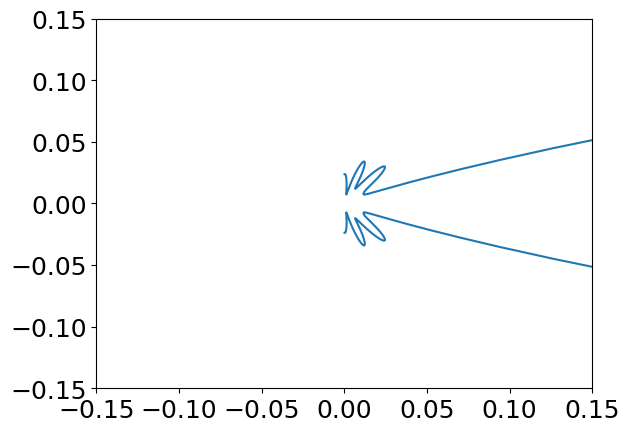

In [374]:
lb = 90
ub = 270
plt.plot(xtest[lb:ub], ytest[lb:ub])
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)

In [375]:
theta = np.linspace(-180,180,360)
xtest = iper*np.cos(theta/180*np.pi)
ytest = iper*np.sin(theta/180*np.pi)

(-0.15, 0.15)

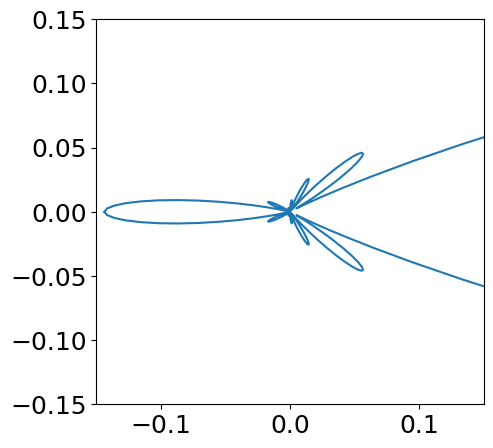

In [376]:
lb = 0
ub = 360
plt.figure(figsize = (5, 5))
plt.plot(xtest[lb:ub], ytest[lb:ub])
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)

In [377]:
print(np.sum(xtest[0:90]) - np.sum(xtest[90:270]) + np.sum(xtest[270:]))
print(np.sum(ytest[0:180]) - np.sum(ytest[180:]))
temp3 = np.sum(xtest[0:90]) - np.sum(xtest[90:270]) + np.sum(xtest[270:])
temp4 = np.sum(ytest[0:180]) - np.sum(ytest[180:])

-56.46273338191675
-9.063662817393187


In [378]:
print(-14.18816920662782/-13.251096780456173)
print((-9.931383406972536/-4.936219622017969)**(-1))
const1 = temp3/temp4
const2 = (temp1/temp2)**(-1)

1.070716593629723
0.49703242939471987


In [379]:
#print(1.070716593629723/(1.070716593629723+0.49703242939471987+1))
#print(1/(1.070716593629723+0.49703242939471987+1))
#print(0.49703242939471987/(1.070716593629723+0.49703242939471987+1))
print(const1/(const1+const2+1))
print(1/(const1+const2+1))
print(const2/(const1+const2+1))
lambda1 = const1/(const1+const2+1)
lambda2 = 1/(const1+const2+1)
lambda3 = const2/(const1+const2+1)

0.8408610243205018
0.134978955927942
0.02416001975155623
